# Project 4, APS1070 Fall 2022
#### **Linear Regression -  14 points**
**Deadline: Dec 1st, 21:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Your **name**: Yuyang Shao
*   Your **student number**: 1002962636



### How to submit **(HTML [This notebook] + IPYNB + GitHub [Part 7])**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files for this notebook on Quercus for grading.

7. Make sure you compeleted the last part on <font color='red'>**GitHub**</font> and added your link to the last cell here. The teaching team will view and grade your part 7 on GitHub.



Ref: https://stackoverflow.com/a/64487858 



## Part 1 - Getting Started [1 marks]

Ailerons are small hinged sections on the outboard portion of a wing used to control the roll of an airplane. In this project, we are going to design a controller to manage the ailerons of an aircraft based on supervised learning.

![Aileron](https://www.eecg.utoronto.ca/~hadizade/APS1070/p3Ar.jpg)




The following dataset contains 13750 instances, where each instance is a set of 40 features describing the airplane's status. Our goal is to use these features to predict the `Goal` column, which is a command that our controller should issue. We will make our predictions by implementing linear regression.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
df=pd.read_csv("https://raw.githubusercontent.com/aps1070-2019/datasets/master/F16L.csv" , skipinitialspace=True)

Here are the steps to complete this portion:

1. Print the dataframe.
2. Prepare your dataset as follows: **[0.5]**
  *   Using `train_test_split` from Sklearn, split the dataset into training, validation, and test sets ($70\%$ training, $15\%$ validation, and $15\%$ test). When splitting, set `random_state=1`.
  *   Standardize the data using `StandardScaler` from sklearn. 
  *   Insert the first column of all $1$s in the training, validation, and test set.
 
3. Explain the difference between epoch and iteration in the Gradient descent algorithm (SGD/mini-batch)? **[0.5]**

In [2]:
df

,inputs ClimbRate,Sgz,P,Q,CurPitch,CurRoll,AbsRoll,DiffClb,DiffRollRate,DiffDiffClb,...,DiffSeTime8,DiffSeTime9,DiffSeTime10,DiffSeTime11,DiffSeTime12,DiffSeTime13,DiffSeTime14,Alpha,Se,Goal
0,-17,-6,-0.03,0.14,0.59,-0.5,-11,-9,0.015,-0.2,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.6,0.021,-0.0008
1,-791,15,-0.28,-0.34,1.11,0.9,-10,27,-0.002,4.7,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.4,0.013,-0.0009
2,-46,48,-0.42,0.07,0.57,0.6,-5,-8,-0.008,0.0,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.019,-0.0005
3,496,-5,-0.21,-0.04,0.03,-0.5,-7,6,-0.002,-0.1,...,0.0,0.000,0.0,0.001,0.0,0.001,0.0,0.5,0.017,-0.0005
4,-124,16,-0.02,0.05,0.61,-0.2,-9,-3,0.000,0.0,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.018,-0.0006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13745,-53,-13,-0.07,0.02,0.58,-2.3,-15,12,0.022,-0.8,...,0.0,0.000,0.0,0.000,0.0,-0.001,0.0,0.5,0.019,-0.0007
13746,1,4,-0.11,-0.07,0.47,0.8,-5,8,-0.003,-0.2,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.016,-0.0004
13747,425,-14,0.40,0.07,0.41,-2.1,-16,12,0.031,-0.7,...,0.0,0.001,0.0,0.000,0.0,0.001,0.0,0.9,0.032,-0.0015
13748,102,-10,-0.19,0.08,1.30,0.5,-10,-3,-0.003,-0.2,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,1.4,0.051,-0.0015


In [3]:
df.columns

Index(['inputs ClimbRate', 'Sgz', 'P', 'Q', 'CurPitch', 'CurRoll', 'AbsRoll',
       'DiffClb', 'DiffRollRate', 'DiffDiffClb', 'SeTime1', 'SeTime2',
       'SeTime3', 'SeTime4', 'SeTime5', 'SeTime6', 'SeTime7', 'SeTime8',
       'SeTime9', 'SeTime10', 'SeTime11', 'SeTime12', 'SeTime13', 'SeTime14',
       'DiffSeTime1', 'DiffSeTime2', 'DiffSeTime3', 'DiffSeTime4',
       'DiffSeTime5', 'DiffSeTime6', 'DiffSeTime7', 'DiffSeTime8',
       'DiffSeTime9', 'DiffSeTime10', 'DiffSeTime11', 'DiffSeTime12',
       'DiffSeTime13', 'DiffSeTime14', 'Alpha', 'Se', 'Goal'],
      dtype='object')

In [4]:
### YOUR CODE HERE ###
y = df.Goal.values.reshape(-1,1)
X = df.drop('Goal',axis=1).values

In [5]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.3, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=1)

In [6]:
scaler = StandardScaler()
#scaler.fit(X_train)
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [7]:
X_train_scaled = np.hstack((np.ones((len(X_train_scaled),1)), X_train_scaled))
X_val_scaled= np.hstack((np.ones((len(X_val_scaled),1)), X_val_scaled))
X_test_scaled = np.hstack((np.ones((len(X_test_scaled),1)), X_test_scaled))

In [8]:
tmp = X_train_scaled
tmp

array([[ 1.        , -0.36108536, -0.90578423, ...,  0.01177061,
        -0.62878591, -0.72132656],
       [ 1.        , -0.99493554, -1.36985832, ...,  0.01177061,
         0.39274576,  0.57795218],
       [ 1.        , -1.1255471 ,  0.17705531, ...,  0.01177061,
        -0.11802007, -0.28823365],
       ...,
       [ 1.        ,  0.10757962,  1.76264179, ...,  0.01177061,
         0.39274576,  0.43358788],
       [ 1.        ,  1.49436698,  0.91183929, ...,  0.01177061,
        -0.62878591, -0.72132656],
       [ 1.        , -0.59541786, -0.20967309, ...,  0.01177061,
        -0.62878591, -0.57696225]])

Epoch can be understood as the number of times the algorithm scans the entire data. Iteration is the number of times a certain batch is passed through an algorithm. For example, if we have total 128 data and the batch size = 32. Then to complete one epoch of training requires 4 iterations.

## Part 2 - Linear Regression Using Direct Solution [1 marks]

Implement the direct solution of the linear regression problem on the training set. **[0.5]**

**Note:** You should use **``scipy.linalg.inv``** to perform the matrix inversion, as ``numpy.linalg.inv`` may cause numerical issues.

Report the root-mean-square error (RMSE) for both the training and validation sets. **[0.5]**

You may use `mean_squared_error` from Sklearn for computing the RMSE.

In [9]:
np.random.seed(42)

In [10]:
import scipy
import matplotlib.pyplot as plt

In [11]:
### YOUR CODE HERE ###
def rmse(yPred, y):
    return np.sqrt(mean_squared_error(y_pred = yPred, y_true=y))

In [12]:
def Direct_sol (X_train,y_train , X_valid, y_valid):
  W = np.dot(scipy.linalg.inv(np.dot(X_train.T, X_train)), np.dot(X_train.T, y_train)) 
  y_pred_train = np.dot(X_train, W) # prediction on the training set
  y_pred_valid = np.dot(X_valid, W) # prediction on the validation set
  RMSE_train = rmse(y_pred_train, y_train)
  RMSE_valid = rmse(y_pred_valid, y_valid)
  print ("RMSE on training set: " , RMSE_train)
  print ("RMSE on validation set: " , RMSE_valid)
  return RMSE_valid

In [13]:
RMSE_val = Direct_sol( X_train_scaled, y_train , X_val_scaled, y_val)

RMSE on training set:  0.0002005433612540485
RMSE on validation set:  0.00019420587958950751


## Part 3 - Full Batch Gradient Descent [2 marks]

We will now implement a "full batch" gradient descent algorithm and record the training time for our model. Recall that the full batch gradient descent is,
 $$w_t = w_{t-1} - \alpha~g_t$$ where $\alpha$ is the learning rate and $g_t$ is your gradient, computed on the entire data. 

Here are the steps for this part:

* Implement gradient descent for linear regression using a fixed learning rate of $\alpha= 0.01$, and iterate until your model's **validation** RMSE converges. 

  We consider the gradient descent as having converged when RMSE on the validation set using gradient descent satisfies:

  $$ RMSE_\text{GD} \leq 1.001 \times RMSE_\text{Direct Solution}$$

  where $RMSE_\text{Direct Solution}$ is the RMSE on the validation set using the direct solution that you have calculated in the previous part. 

  We refer to the quantity $RMSE_\text{Direct Solution}\times 1.001$ as the convergence threshold (CT).

*  Record the training time (from the first iteration until convergence) using the `time.time()` function. Be sure to compute the gradients yourself! Take a look at the code provided in the tutorial. **[0.5]**

* Plot the training RMSE and the validation RMSE vs. epoch on the same figure.  **[0.5]**

* Comment on overfitting/underfitting by observing the training and validation RMSE **[1]**

**Hint**: Initialize your weights with small random numbers (<$0.001$)

In [14]:
X_train_scaled.shape

(9625, 41)

In [15]:
RMSE_val* 1.001

0.000194400085469097

In [16]:
np.random.random(X_train_scaled.shape[1])/1000

array([3.74540119e-04, 9.50714306e-04, 7.31993942e-04, 5.98658484e-04,
       1.56018640e-04, 1.55994520e-04, 5.80836122e-05, 8.66176146e-04,
       6.01115012e-04, 7.08072578e-04, 2.05844943e-05, 9.69909852e-04,
       8.32442641e-04, 2.12339111e-04, 1.81824967e-04, 1.83404510e-04,
       3.04242243e-04, 5.24756432e-04, 4.31945019e-04, 2.91229140e-04,
       6.11852895e-04, 1.39493861e-04, 2.92144649e-04, 3.66361843e-04,
       4.56069984e-04, 7.85175961e-04, 1.99673782e-04, 5.14234438e-04,
       5.92414569e-04, 4.64504127e-05, 6.07544852e-04, 1.70524124e-04,
       6.50515930e-05, 9.48885537e-04, 9.65632033e-04, 8.08397348e-04,
       3.04613769e-04, 9.76721140e-05, 6.84233027e-04, 4.40152494e-04,
       1.22038235e-04])

In [17]:
import time
start_time = time.time() ## Records current time

## GD Script -- Sample code in tutorial! ##
w = (np.random.random(X_train_scaled.shape[1])/1000).reshape(1,-1)# small random numbers < 0.001
ct = RMSE_val* 1.001
lr = 0.01

rmse_t = []
rmse_v = []

for epoch in range (0, 100000): 
  y_pred_train = np.dot(X_train_scaled,w.T).reshape(-1,1)
  rmse_t.append(rmse(y_pred_train,y_train))
  y_pred_val = np.dot(X_val_scaled, w.T)
  rmse_v.append(rmse(y_pred_val, y_val))  
  if rmse(y_pred_val, y_val) <= ct:
    # start at epoch0, +1, make it start at epoch1
    print(f"Exit at epoch {epoch+1}")
    break
  gradient = (1/len(y_pred_train) * np.dot(X_train_scaled.T, y_pred_train-y_train)).reshape(1,-1)
  w = w - lr * gradient ### weight update


print("--- Total Training Time: %s (s) ---" % (time.time() - start_time))

Exit at epoch 2440
--- Total Training Time: 17.443866968154907 (s) ---


In [18]:
rmse_v[-1]

0.000194392032441811

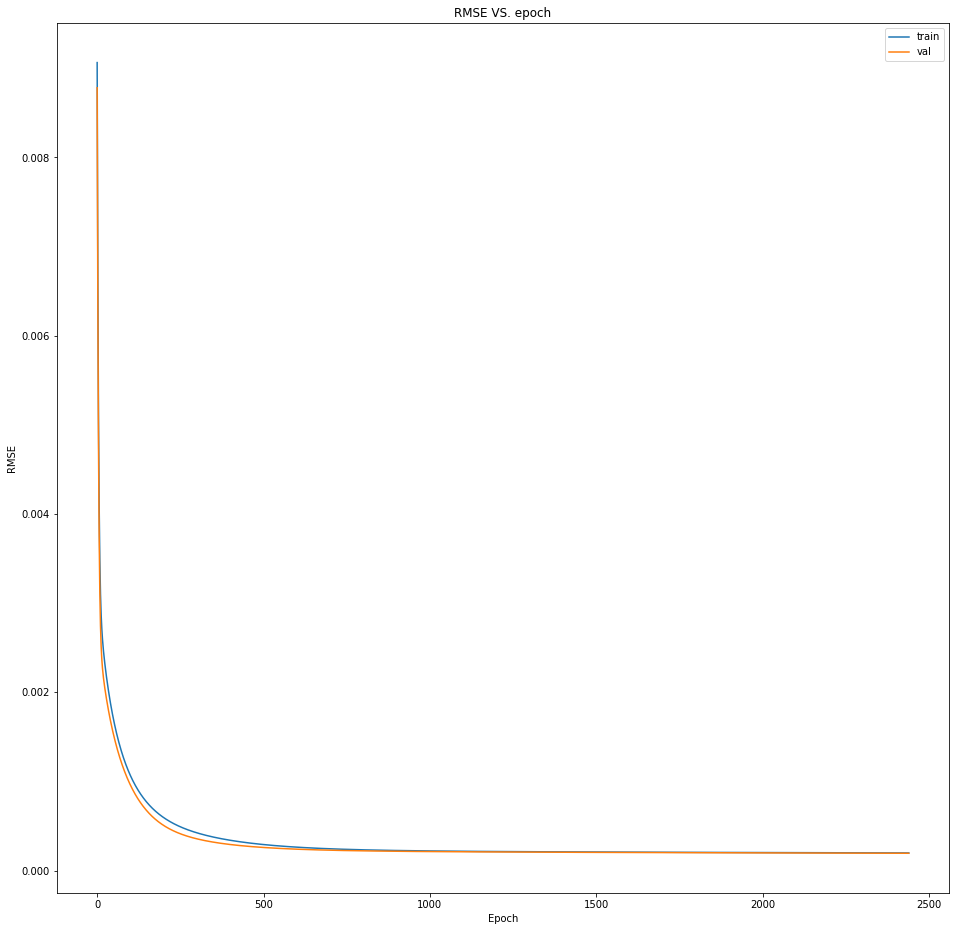

In [19]:
plt.rcParams["figure.figsize"] = (16,16)
plt.plot(rmse_t, label = 'train')
plt.plot(rmse_v, label = 'val')
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.title('RMSE VS. epoch')
plt.legend()
plt.show()

There is no obvious overfitting or underfitting issue. To qualigy overfitting, training error needs to be low and validation error needs to be high. To qualify underfitting, both training and validation error need to be high. There are no such signs found from the above graph.

## Part 4 - Mini-batch and Stochastic Gradient Descent [4 marks]

Write a function that performs mini-batch gradient descent until the convergence threshold (CT) is reached. **[1]**

The inputs of that function are: 
  * Input data (training/validation), Batch size, Learning Rate, Convergence Threshold (CT)

Your function will return the following arrays: 
 * The final weights after training.
 * The training RMSE at each epoch.
 * The validation RMSE at each epoch.
 * An array that has the elapsed time from the start of the training process to the end of each epoch (e.g., if each epoch takes exactly 2 seconds, the array would look like: [2 4 6 8 ...]).

Notes: 
* For certain batch sizes, GD might not converge to a solution. For that reason, you need to check the RMSE of the validation/training set at each epoch, and if it's getting larger and larger, you should stop the training for that case (the design is up to you!).
* CT will help you to know when your model is converged. 
* **Important: after each epoch, you need to shuffle the entire training set.** This ensures that new mini-batches are selected for every epoch. Hint: use `np.random.permutation`. 

Let's now use the function to investigate the effect of batch size on convergence. When the batch size is 1, we call that stochastic gradient descent. When the batch size equals the # of training data, it is full-batch (i.e., all data points are used at every iteration). Anywhere in between is mini-batch (we use some of the data).
  * Sweep different values for the mini-batch size (at least 5 values that **converge**), each time using a learning rate of $\alpha= 0.01$. **Hint: Try batch sizes that are powers of two (e.g., 2,4,8,16,32,64,128...).** These batch sizes fit better on the hardware and may achieve higher performance.  **[0.5]**

Provide the following $3$ plots:
  1.  Plot training and validation RMSE vs. **epoch** for all the **converging** batch sizes (some batch sizes might not converge) in a figure. The X-axis is Epoch # and the Y-axis is RMSE. **[0.5]**
  2. Plot training and validation RMSE vs. **time** for all the **converging** batch sizes in a figure. The X-axis is Time, and the Y-axis is RMSE. **[0.5]**
  3. Plot Total training time (y-axis) vs. Batch size (x-axis). **[0.5]**

Describe your findings, including the main takeaways from each of your plots. **[1]**

In [20]:
### YOUR CODE HERE ###

def MB_SGD(X_train, X_val, y_train, y_val, bs, lr, ct):

  weights,rmse_t,rmse_v,time_elapsed = [],[],[],[]

  start_time = time.time()
  #initialize weights < 0.001
  w = (np.random.random(X_train.shape[1])/1000).reshape(1,-1)
  # start at epoch1
  num_epoch = 1  
  rmse_train_epoch = 0 
  rmse_val_epoch = 10  # initialize a number > ct to start the loop
  # we will train for more epochs unless we get an increasing RMSE for 3 consecutive epochs or val RMSE <= 1.001 * CT
  while rmse_val_epoch > ct:
    #mini-batch sgd
    #step size = bs
    #array indexing takes care of last batch if i + bs > X_train.shape[0]-1. 
    #if X_train.shape[0] = 100, X_train[:-1] = X_train[:any num > 100]
    #we will update the weights roughly X_train.shape[0]/bs times for each epoch
    for i in range(0, X_train.shape[0], bs):
      X_train_batch = X_train[i:i+bs]     
      y_train_batch = y_train[i:i+bs]
      #print(y_train_batch.shape)
      y_pred_batch = np.dot(X_train_batch, w.T).reshape(-1,1)
      #print(X_train_batch.T.shape,(y_pred_batch-y_train_batch).shape,y_pred_batch.shape)
      gradient = (1/len(y_pred_batch) * np.dot(X_train_batch.T, y_pred_batch-y_train_batch)).reshape(1,-1)
      w = w - lr * gradient

    # time elapsed for each epoch
    te_epoch = time.time() - start_time 

    # Calculate epoch RMSE for train and val set
    y_pred_train = np.dot(X_train, w.T)
    rmse_train_epoch = rmse(y_pred_train, y_train)
    y_pred_val = np.dot(X_val, w.T)
    rmse_val_epoch = rmse(y_pred_val, y_val)

    # record necessary data to be returned
    time_elapsed.append(te_epoch)    
    weights.append(w)
    rmse_t.append(rmse_train_epoch)
    rmse_v.append(rmse_val_epoch)


    # shuffle the training data after each epoch
    shuffled_ind = list(np.random.permutation(X_train.shape[0]))
    X_train = X_train[shuffled_ind]
    y_train = y_train[shuffled_ind]    

    # if train/val RMSE increases for 3 consecutive epochs, set signal to true and exit training.
    if num_epoch >=4 and ((rmse_v[-1] > rmse_v[-2] and rmse_v[-2] > rmse_v[-3] and rmse_v[-3] > rmse_v[-4])\
    or (rmse_t[-1] > rmse_t[-2] and rmse_t[-2] > rmse_t[-3] and rmse_t[-3] > rmse_t[-4])):
      print(f"Can't converge for batch size = {bs}, Stop training at epoch {num_epoch}")
      break

    # continue to next epoch of training
    num_epoch += 1

  return weights[-1], rmse_t, rmse_v, time_elapsed


In [21]:
RMSE_val

0.00019420587958950751

In [22]:
for batch in [8, 16, 32, 64, 128, 256, 512, 1024,2048]:
  weight, rmse_t, rmse_v, elapsed_time, = MB_SGD(X_train_scaled, X_val_scaled, y_train, y_val, bs=batch, lr=0.01, ct= 1.001 * RMSE_val)

Can't converge for batch size = 8, Stop training at epoch 4
Can't converge for batch size = 16, Stop training at epoch 4
Can't converge for batch size = 32, Stop training at epoch 4
Can't converge for batch size = 64, Stop training at epoch 51


batch size of 128, 256, 512, 1024,2048 can converge

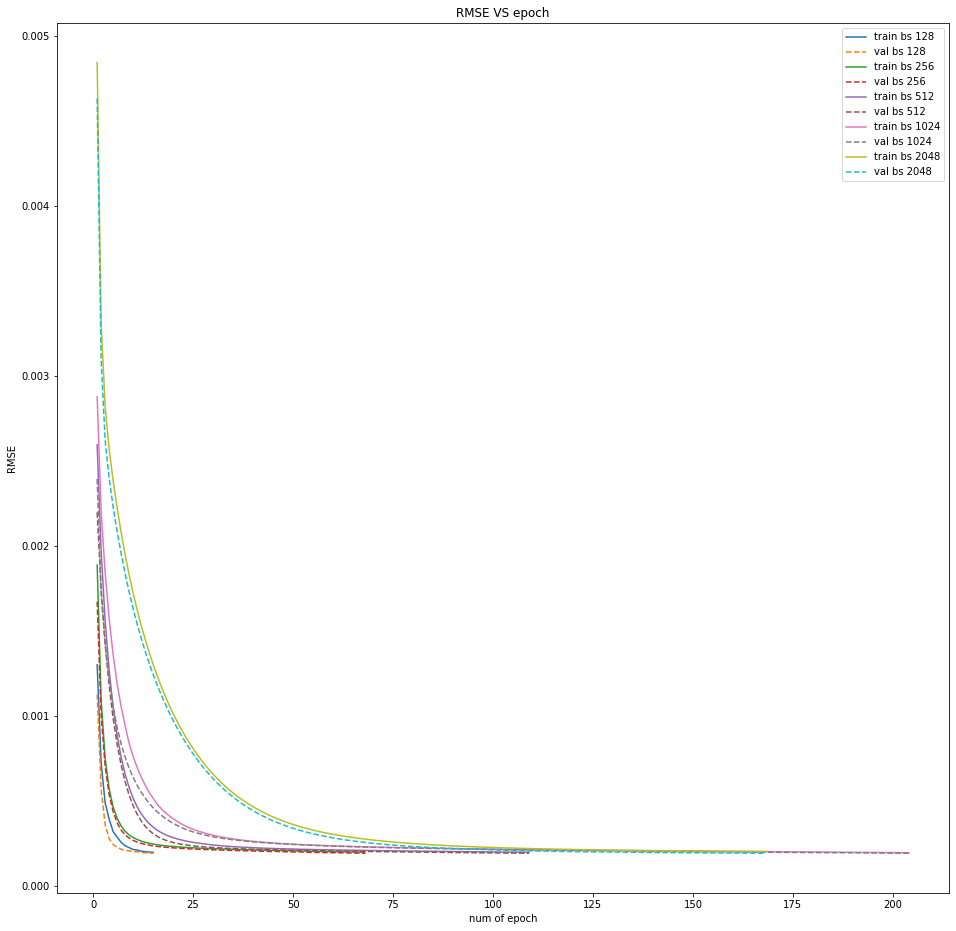

In [23]:
# Plot training and validation RMSE vs. epoch for all the converging batch sizes (some batch sizes might not converge) in a figure# Plot training and validation RMSE vs. epoch for all the converging batch sizes (some batch sizes might not converge) in a figure
plt.rcParams["figure.figsize"] = (16,16)
#et_list = []
batches = [128, 256, 512, 1024,2048]
for batch in batches:
  _, rmse_t, rmse_v, elapsed_time = MB_SGD(X_train_scaled, X_val_scaled, y_train, y_val, bs=batch, lr=0.01, ct= 1.001 * RMSE_val)  
  #et_list.append(elapsed_time[-1])
  plt.title('RMSE VS epoch')
  #start at epoch1
  plt.plot(np.arange(len(rmse_t))+1, rmse_t, label = f'train bs {batch}', linestyle = '-') 
  plt.plot(np.arange(len(rmse_v))+1, rmse_v, label = f'val bs {batch}',linestyle = '--') 
  plt.xlabel('num of epoch')
  plt.ylabel('RMSE')
  plt.legend() 
plt.show()  

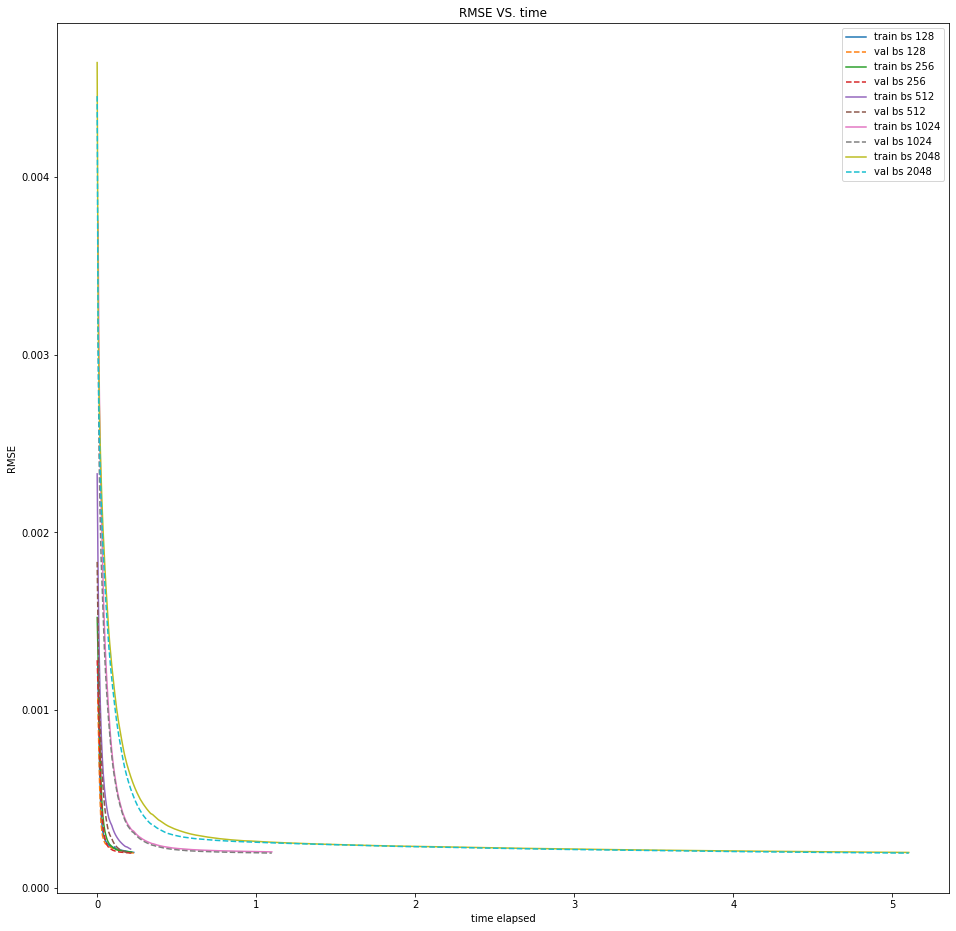

In [24]:
#Plot training and validation RMSE vs. time for all the converging batch sizes in a figure. The X-axis is Time, and the Y-axis is RMSE.
plt.rcParams["figure.figsize"] = (16,16)
for batch in [128, 256, 512, 1024,2048]:
  _, rmse_t, rmse_v, elapsed_time = MB_SGD(X_train_scaled, X_val_scaled, y_train, y_val, bs=batch, lr=0.01, ct= 1.001 * RMSE_val)  
  plt.title('RMSE VS. time')
  plt.plot(elapsed_time, rmse_t, label = f'train bs {batch}', linestyle = '-') 
  plt.plot(elapsed_time, rmse_v, label = f'val bs {batch}',linestyle = '--') 
  plt.xlabel('time elapsed')
  plt.ylabel('RMSE')
  plt.legend() 
plt.show()  

Can't converge for batch size = 8, Stop training at epoch 4
Can't converge for batch size = 16, Stop training at epoch 4
Can't converge for batch size = 32, Stop training at epoch 4
Can't converge for batch size = 64, Stop training at epoch 5


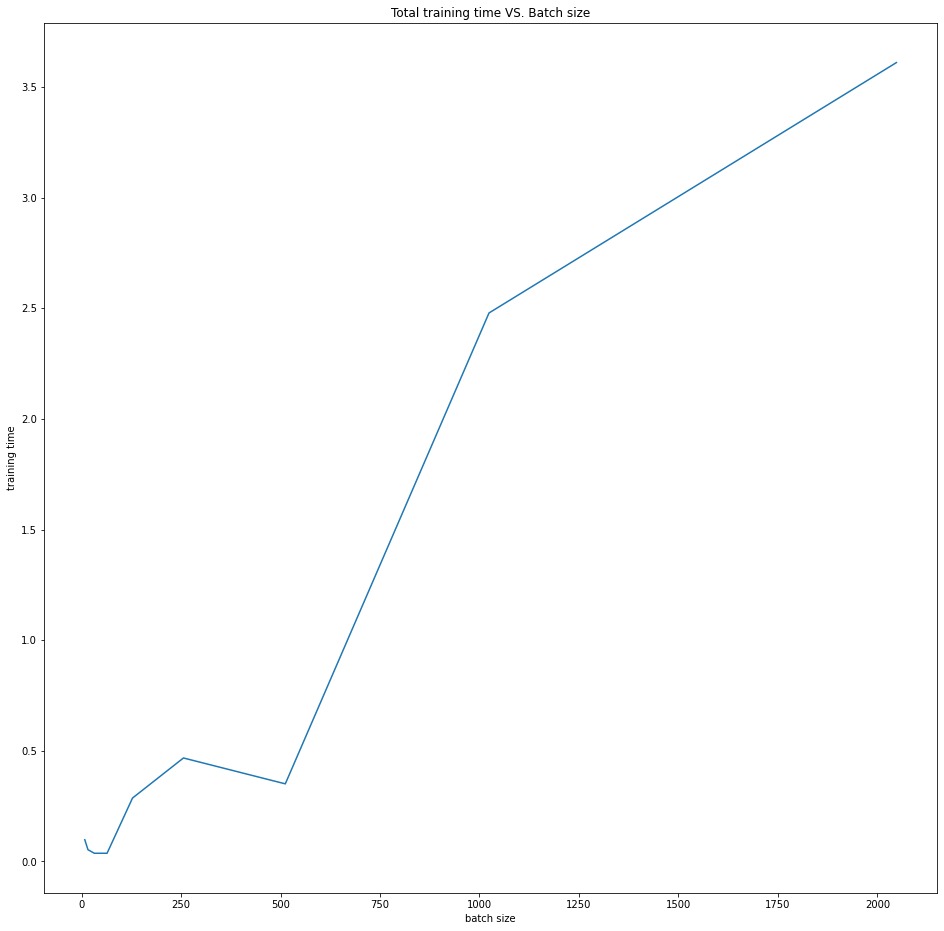

In [25]:
#Plot Total training time (y-axis) vs. Batch size (x-axis)
plt.rcParams["figure.figsize"] = (16,16)
et_list = []
batches = [8,16,32,64,128,256,512,1024,2048]
for batch in batches:
  _, _, _, elapsed_time = MB_SGD(X_train_scaled, X_val_scaled, y_train, y_val, bs=batch, lr=0.01, ct= 1.001 * RMSE_val)  
  et_list.append(elapsed_time[-1])

plt.title('Total training time VS. Batch size')
plt.plot(batches, et_list,linestyle = '-') 
plt.xlabel('batch size')
plt.ylabel('training time')
#plt.legend()  
plt.show()

Findings: The larger the batch size, the longer it takes for the model to train and converge. RMSE reduces very fast at the beginning of the training process and the speed of decreasing reduces overtime. The number of gradient updates per pass of the data is reduced when using large batches. Large batches has lesser noise in the gradients and so better is the gradient estimate. This allows the model to take a better step towards a minima. The disadvantage is that the training process for models with larger batch sizes are time consuming and they also require a lot of memory. When our dataset becomes larger, training using large batch size can be very expensive.

## Part 5 - Gradient Descent Learning Rate [2 marks]
Use the function that you designed in Part 4 to investigate the effect of learning rate on convergence.

1. Pick 3 batchsize that are not converging with a learning rate of $\alpha= 0.01$ (last part) and try to find a learning rate that results in convergence for each batchsize. Report your findings in a table. Mention batch size, learning rate, and training and validation RMSE. **[0.5]**

2. Select the best batchsize based on Part 4's fastest convergence time and sweep the learning rate (at least 10 values, all should converge) while applying Mini-batch GD. 
  
  * Plot the training and validation RMSE vs. **epoch** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  * Plot the training and validation RMSE vs. **time** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  * Describe your findings, including the main takeaways from each of your plots. **[0.5]**

In [26]:
def MB_SGD2(X_train, X_val, y_train, y_val, bs, lr, ct):

  weights,rmse_t,rmse_v,time_elapsed = [],[],[],[]
  start_time = time.time()
  #initialize weights < 0.001
  w = (np.random.random(X_train.shape[1])/1000).reshape(1,-1)
  # start at epoch1
  num_epoch = 1  
  rmse_train_epoch = 0 
  rmse_val_epoch = 10  # initialize a number > ct to start the loop
  signal = False  # initialize to false, if it is true, it means RMSE grows for 3 consecutive epoch. Exit training.
  # we will train for more epochs unless we get an increasing RMSE for 3 consecutive epochs or RMSE <= 1.001 * CT
  while rmse_val_epoch > ct:
    #mini-batch sgd
    #step size = bs
    #array indexing takes care of last batch if i + bs > X_train.shape[0]-1. 
    #if X_train.shape[0] = 100, X_train[:-1] = X_train[:any num > 100]
    #we will update the weights roughly X_train.shape[0]/bs times for each epoch
    for i in range(0, X_train.shape[0], bs):
      X_train_batch = X_train[i:i+bs]     
      y_train_batch = y_train[i:i+bs]
      #print(y_train_batch.shape)
      y_pred_batch = np.dot(X_train_batch, w.T).reshape(-1,1)
      #print(X_train_batch.T.shape,(y_pred_batch-y_train_batch).shape,y_pred_batch.shape)
      gradient = (1/len(y_pred_batch) * np.dot(X_train_batch.T, y_pred_batch-y_train_batch)).reshape(1,-1)
      w = w - lr * gradient

    # time elapsed for each epoch
    te_epoch = time.time() - start_time 

    # Calculate epoch RMSE for train and val set
    y_pred_train = np.dot(X_train, w.T)
    rmse_train_epoch = rmse(y_pred_train, y_train)
    y_pred_val = np.dot(X_val, w.T)
    rmse_val_epoch = rmse(y_pred_val, y_val)

    # record necessary data to be returned
    time_elapsed.append(te_epoch)    
    weights.append(w)
    rmse_t.append(rmse_train_epoch)
    rmse_v.append(rmse_val_epoch)


    # shuffle the training data after each epoch
    shuffled_ind = list(np.random.permutation(X_train.shape[0]))
    X_train = X_train[shuffled_ind]
    y_train = y_train[shuffled_ind]    

    # if train/val RMSE increases for 3 consecutive epochs, exit training.
    if num_epoch >=4 and ((rmse_v[-1] > rmse_v[-2] and rmse_v[-2] > rmse_v[-3] and rmse_v[-3] > rmse_v[-4])\
    or (rmse_t[-1] > rmse_t[-2] and rmse_t[-2] > rmse_t[-3] and rmse_t[-3] > rmse_t[-4])):
      signal=True
      #print(f"Can't converge for batch size = {bs}, Stop training at epoch {num_epoch}")
      break

    # continue to next epoch of training
    num_epoch += 1
  
  return weights[-1], rmse_t, rmse_v, time_elapsed, not signal

In [27]:
#1

In [28]:
df_batch = pd.DataFrame(columns = ['bs','lr','train_RMSE','val_RMSE'],index=[0,1,2])
df_batch

,bs,lr,train_RMSE,val_RMSE
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN


In [29]:
### YOUR CODE HERE ###
lr_list = [0.1, 0.05, 0.02, 0.005, 0.002, 0.001, 0.0005, 0.0002, 0.0001, 5e-05, 2e-05, 1e-05]
# bs=8,16,32 not converging
counter=0
batches = [8,16,32]
for batch in batches:
  for lr in lr_list:
    # add signal as one of the return values to show if the batch converge or not
    _, rmse_t, rmse_v, _,signal = MB_SGD2(X_train_scaled, X_val_scaled, y_train, y_val, bs=batch, lr=lr, ct= 1.001 * RMSE_val) 
    if signal:
      df_batch.loc[counter,'bs'] = batch
      df_batch.loc[counter,'lr'] = lr
      df_batch.loc[counter,'train_RMSE'] = rmse_t[-1]
      df_batch.loc[counter,'val_RMSE'] = rmse_v[-1]
      counter+=1
      break

In [30]:
df_batch

,bs,lr,train_RMSE,val_RMSE
0,8,0.001,0.000202,0.000194
1,16,0.002,0.000202,0.000194
2,32,0.002,0.000199,0.000194


In [31]:
#2

In [32]:
df_lr = pd.DataFrame(columns = ['lr','train_RMSE','val_RMSE','converge'],index=np.arange(11))

In [33]:
# batch size = 128 has the fastest convergence time
lr_list = [0.01,0.009,0.008,0.007,0.006,0.005,0.002,0.001,0.0002,0.0001,0.00008]
counter=0
dic = {}
for lr in lr_list:
  # add signal as return value to show if the batch converge or not
  _, rmse_t, rmse_v, elapsed_time,signal = MB_SGD2(X_train_scaled, X_val_scaled, y_train, y_val, bs=128, lr=lr, ct= 1.001 * RMSE_val) 
  df_lr.loc[counter,'lr'] = lr
  df_lr.loc[counter,'train_RMSE'] = rmse_t[-1]
  df_lr.loc[counter,'val_RMSE'] = rmse_v[-1]  
  df_lr.loc[counter,'converge'] = signal
  dic[lr] = {"train":rmse_t, 'val':rmse_v, 'time':elapsed_time}
  counter+=1

In [34]:
df_lr

,lr,train_RMSE,val_RMSE,converge
0,0.01,0.000202,0.000194,True
1,0.009,0.0002,0.000194,True
2,0.008,0.000202,0.000194,True
3,0.007,0.000203,0.000194,True
4,0.006,0.000198,0.000192,True
5,0.005,0.000202,0.000194,True
6,0.002,0.000199,0.000194,True
7,0.001,0.000202,0.000194,True
8,0.0002,0.000202,0.000194,True
9,0.0001,0.000201,0.000194,True


In [35]:
#Plot the training and validation RMSE vs. epoch (x-axis) for all the learning rates that you tried in a figure. 
#Plot the training and validation RMSE vs. time (x-axis) for all the learning rates that you tried in a figure. 
#Describe your findings, including the main takeaways from each of your plots.


In [36]:
len(dic[0.001]['val'])

133

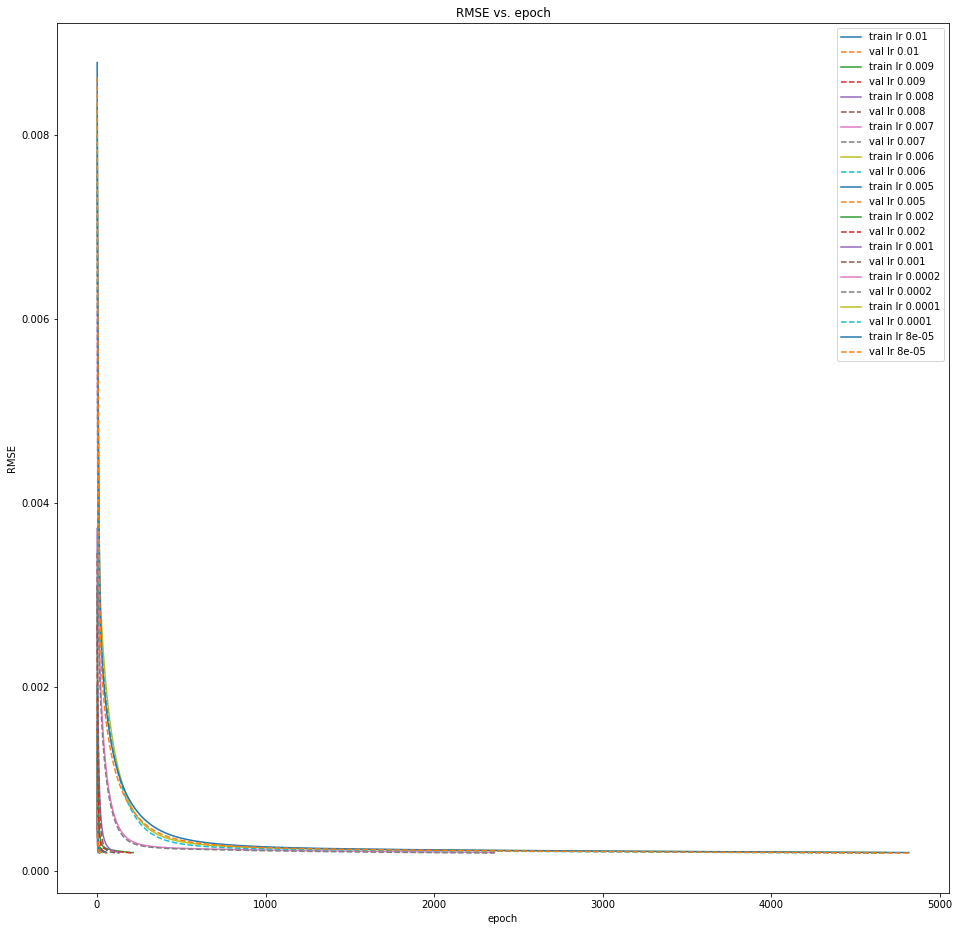

In [37]:
plt.rcParams["figure.figsize"] = (16,16)
for lr in lr_list:
  plt.plot(np.arange(len(dic[lr]['train']))+1, dic[lr]['train'], label = f'train lr {lr}', linestyle = '-')
  plt.plot(np.arange(len(dic[lr]['val']))+1, dic[lr]['val'], label = f'val lr {lr}',linestyle = '--')
  plt.title('RMSE vs. epoch')
  plt.xlabel('epoch')
  plt.ylabel('RMSE')
  plt.legend()  
plt.show()   

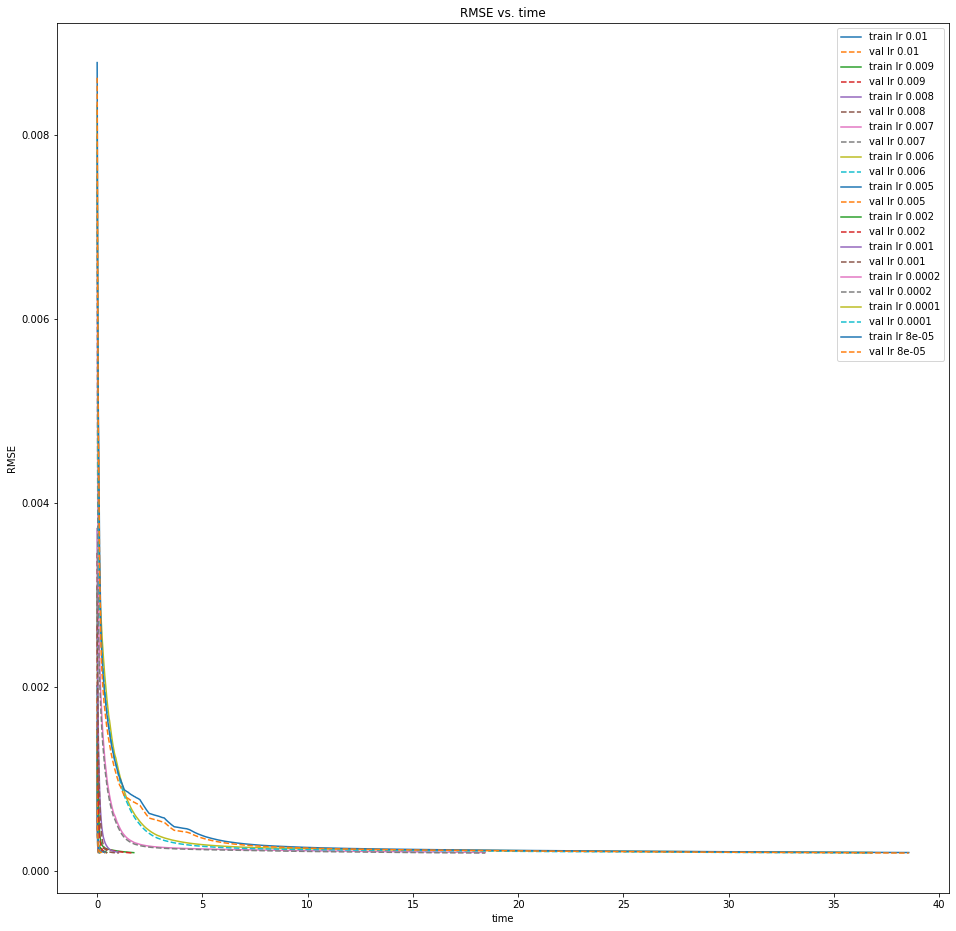

In [38]:
plt.rcParams["figure.figsize"] = (16,16)
for lr in lr_list:
  plt.plot(dic[lr]['time'], dic[lr]['train'], label = f'train lr {lr}', linestyle = '-')
  plt.plot(dic[lr]['time'], dic[lr]['val'], label = f'val lr {lr}',linestyle = '--')
  plt.title('RMSE vs. time')
  plt.xlabel('time')
  plt.ylabel('RMSE')
  plt.legend() 
plt.show()   

The smaller the learning rate, the longer it takes for the model to converge.<br>The smaller the learning rate, the more epochs it takes for the model to converge.<br>
RMSE reduces very fast at the beginning of the training process and the speed of decreasing reduces overtime.<br>
Sometimes smaller learning rate may even get stuck, which makes the model fail to converge.

## Part 6 - Finalizing a model [1 marks]
Based on your findings from the previous parts, pick a model (or combination of model settings) that you think would work best for our dataset and evaluate it on the test set. 

Briefly describe your model selections/settings. **[0.5]** 

Summarize the performance of your model for the task of managing ailerons of an aircraft. **[0.5]** 

From the previous parts, we know that models using some batch sizes will fail to converge. So we only choose from the batch sizes that do converge. We also leaned that small learning rates and large batch sizes will make the training time longer. So in my opinion, the best model in this case should have a relatively higher learning rate and smaller batch size, which still can make the model converge while saving a lot of training time. <br>
In the previous part, we already learned that model with batch size = 128 and learning rate = 0.01 converges with the shortest time. So I will use this combination to test out the model.

In [39]:
### YOUR CODE HERE ###
# get the best model and apply the final weights to the test set
weight, rmse_t, rmse_v, elapsed_time, = MB_SGD(X_train_scaled, X_val_scaled, y_train, y_val, bs=128, lr=0.01, ct= 1.001 * RMSE_val)

In [40]:
y_pred_test = np.dot(X_test_scaled, weight.T)
rmse_test = rmse(y_pred_test, y_test)

In [41]:
print(f"The test rmse is {rmse_test}.")

The test rmse is 0.00018931766903027177.


In [42]:
# val and train rmse for the last epoch
rmse_v[-1],rmse_t[-1]

(0.00019249014397616188, 0.00019870008913999755)

In [43]:
# direct solution benchmark of validation rmse
RMSE_val

0.00019420587958950751

The test RMSE is very good, it is even lower than both train and validation rmse. It means the training data is representitive and the model generalizes well to the test data. It is also lower than the benchmark validation rmse which uses direct solution

## Part 7 - Getting started with GitHub  [3 marks]

This final part of the project assignment is to be completed independently from Parts 1 - 6. In this part you will be completing some additional coding tasks using a different dataset and submitting your results on Github. To access this part of the assignment and upload your answers, you will need to use Github. Please complete the following step-by-step instructions:

 0. Create a Github account and install git for Windows or Mac: 
  * https://git-scm.com/download/win
  * https://git-scm.com/download/mac

 1. Open this link: https://classroom.github.com/a/ZC8Petsq to create your assignment repository in GitHub. You should get a link similar to:
```
https://github.com/APS-1070-2021/f22-project4-git-*********
```
This your private repository to get this part questions and upload your answers. **Copy this link to the text box below to be graded for this part.**

 
 2. Open `Git Bash`, the app you downloaded in step `0`, and set your Email and username by:
```
git config --global user.email “<your-GitHub-email>”
git config --global user.name “<your-GitHub-username>”
```

 3. Create a folder for the course on your computer and `cd` to that. `cd` means `Change Directory`. For example, on a Windows machine, where I have a folder on "C:\aps1070":
 ```
cd c:aps1070
```
 4. Get your assignment by the link you got in step 1:
```
git clone https://github.com/APS-1070-2021/f22-project4-git-*********
```
If this is the first time you are using Git Bash, it will ask you to sign in on GitHub via your browser. 

 5. A new folder should be created in your directory similar to:
```
C:\aps1070\f22-project4-git-********
```
This folder has an `ipynb` notebook which you need to manually upload to colab and answer its questions. 

 6. After you finished working on this notebook, download the notebook from colab and move it to the directory in step 5.

 7. Replace the old notebook with the new one that has your answers. Make sure your completed notebook has the same name as the original notebook you downloaded. 

 8. To submit your work, follow: 
```
cd <your assignment folder>
git add F22_Project_4_git.ipynb
git commit -m “Final Submission”
git push 
```
If you had any problem with pushing your work on GitHub you can try one of following commands:
```
git push --force
or 
git push origin HEAD:main
```

 9. Make sure your submission is ready for grading. Open the private repository link in your browser and make sure you can see your final submission with your latest changes there. **Only you and the teaching team can open that link.** 

**Private Repository Link : <font color='red'>** **https://github.com/APS-1070-2021/f22-project4-git-Yuyang971016**</font>